In [1]:
#Importing packages

import pandas as pd 
import numpy as np


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#Reading raw dataset 

train_dataset=pd.read_csv('../data/raw/train.csv')
test_dataset=pd.read_csv('../data/raw/test.csv')

/var/folders/w6/skyqkqrx1_q7pbxvh4_c7g_00000gn/T/ipykernel_94392/1945781094.py:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_dataset=pd.read_csv('../data/raw/train.csv')


In [3]:
# !git add .
# !git commit -m "Adding baseline notebook and reading the datasets"
# !git push

In [4]:
train_dataset.shape

(56091, 64)

In [5]:
train_dataset.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.3938,2.5,2009,all,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.0660,3.4,2009,all,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.1070,1.7,2009,all,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.2086,2.0,2009,all,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.8554,3.8,2009,all,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0


In [6]:
train_dataset['type'].unique()

array(['all'], dtype=object)

In [7]:
# Finding the proportion of missing value

train_dataset.isnull().sum()*100/train_dataset.shape[0]


team                    0.000000
conf                    0.000000
GP                      0.000000
Min_per                 0.000000
Ortg                    0.000000
usg                     0.000000
eFG                     0.000000
TS_per                  0.000000
ORB_per                 0.000000
DRB_per                 0.000000
AST_per                 0.000000
TO_per                  0.000000
FTM                     0.000000
FTA                     0.000000
FT_per                  0.000000
twoPM                   0.000000
twoPA                   0.000000
twoP_per                0.000000
TPM                     0.000000
TPA                     0.000000
TP_per                  0.000000
blk_per                 0.000000
stl_per                 0.000000
ftr                     0.000000
yr                      0.520583
ht                      0.174716
num                     8.361413
porpag                  0.000000
adjoe                   0.000000
pfr                     0.000000
year      

In [8]:
train_dataset.describe()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,porpag,adjoe,pfr,year,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted
count,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,17036.000000,51901.000000,50010.000000,50010.000000,50010.000000,50010.000000,46627.000000,46403.000000,50010.000000,50010.000000,25298.000000,1386.000000,56047.000000,56047.000000,56047.000000,56047.000000,56047.000000,56047.000000,56047.000000,56047.000000,56053.000000,56047.000000,56047.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56091.000000
mean,23.411973,37.325229,91.858295,18.149265,44.575513,47.676882,5.575376,12.673716,10.848740,20.337819,32.926708,47.152627,0.579696,41.412401,85.319160,0.426941,15.677613,45.616480,0.227449,1.876426,1.715305,37.437150,0.775720,89.328297,4.242936,2014.536557,53.456363,0.932305,28.066087,47.052490,14.494741,40.523115,0.564080,0.323633,3.836553,4.311618,0.863570,33.254690,103.319021,103.476636,1.438807,82.827595,-2.525068,-1.896939,-0.628129,-2.525672,16.973259,-2.083375,-0.442297,0.770611,1.892593,2.663204,1.073038,0.529475,0.282825,5.775381,0.009556
std,10.090542,28.061897,30.538819,6.204489,18.213813,17.414133,9.480239,10.878099,9.356001,12.226129,36.870041,49.557538,0.268678,43.730858,85.130054,0.193498,21.584619,58.060609,0.190430,5.876399,2.080477,36.813143,1.333574,30.923798,4.610406,3.450911,27.641745,0.696625,30.144876,47.582825,17.538837,44.401559,0.190824,0.171453,7.943541,8.709568,0.230396,16.651343,10.163752,11.033215,1.064868,65.344533,7.586977,5.184468,4.280805,8.304955,10.623801,6.190166,3.279438,0.738899,1.479148,2.099913,1.171148,0.469152,0.417754,4.953723,0.097287
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.792410,-39.021300,0.000000,2009.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1330.060000,-1292.020000,-0.857238,0.043033,-102.186000,-92.593500,-57.459400,-242.523000,0.000000,-141.539000,-100.984000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,9.500000,84.100000,14.500000,40.100000,43.930000,1.800000,8.400000,4.600000,14.800000,4.000000,7.000000,0.500000,5.000000,13.000000,0.375000,0.000000,1.000000,0.000000,0.000000,0.900000,19.400000,-0.170944,79.383600,2.800000,2012.000000,30.600000,0.459428,4.000000,8.000000,2.000000,6.000000,0.500000,0.250000,0.000000,0.000000,0.818200,20.000000,99.013850,98.083800,0.525770,19.846900,-5.377530,-3.986970,-2.285125,-5.379030,7.307700,-4.426515,-1.728030,0.225800,0.700000,1.000000,0.222200,0.160000,0.000000,1.571400,0.000000
50%,28.000000,35.900000,97.100000,18.100000,47.700000,50.850000,4.300000,11.900000,9.100000,19.100000,20.000000,31.000000,0.660000,27.000000,60.000000,0.460000,5.000000,18.000000,0.275000,0.800000,1.500000,32.800000,0.390392,94.648900,3.800000,2015.000000,55.400000,0.822562,18.000000,33.000000,8.000000,25.000000,0.580600,0.333300,0.000000,1.000000,1.000000,34.000000,103.671000,103.827000,1.266370,76.607600,-1.817550,-1.333140,-0.576564,-1.788120,16.714300,-1.580380,-0.313051,0.545500,1.633300,2.259300,0.677400,0.424200,0.133300,4.482800,0.000000
75%,31.000000,62.200000,106.900000,21.800000,53.200000,56.060000,8.100000,16.000000,15.100000,24.500000,50.000000,72.000000,0.755

In [9]:
# EDA pivot table of conf and drafted

pivot_table = train_dataset.pivot_table(index='conf', values='drafted', aggfunc='mean')*100
print(pivot_table)


# Looks like 'conf' variable will have considerable effect on the algorithm


       drafted
conf          
A10   0.440917
ACC   4.614715
AE    0.000000
ASun  0.000000
Amer  0.955110
B10   2.543570
B12   3.558926
BE    2.529084
BSky  0.183486
BSth  0.000000
BW    0.069686
CAA   0.426829
CUSA  0.425935
GWC   0.000000
Horz  0.393959
Ind   0.000000
Ivy   0.067659
MAAC  0.000000
MAC   0.052247
MEAC  0.049334
MVC   0.129366
MWC   1.132788
NEC   0.000000
OVC   0.395704
P10   4.096386
P12   4.197202
Pat   0.062933
SB    0.215401
SC    0.112994
SEC   3.910869
SWAC  0.000000
Slnd  0.000000
Sum   0.145773
WAC   0.371195
WCC   0.603622
ind   0.000000


In [10]:
# EDA pivot table of yr and drafted

pivot_table = train_dataset.pivot_table(index='yr', values='drafted', aggfunc='mean')*100
print(pivot_table)

# Doesnt look like its going to be significant, plus there are missing values, better to be removed

       drafted
yr            
0     0.000000
42.9  0.000000
57.1  0.000000
Fr    0.852006
Jr    0.710313
So    0.935708
Sr    1.408229


In [11]:
# EDA pivot table of year and drafted

pivot_table = train_dataset.pivot_table(index='year', values='drafted', aggfunc='mean')*100
print(pivot_table)

# Doesnt look like its going to be significant, better to be removed


       drafted
year          
2009  1.002397
2010  1.106854
2011  0.945471
2012  1.090275
2013  0.911458
2014  0.889454
2015  0.889077
2016  0.872898
2017  0.948767
2018  0.871784
2019  0.949367
2020  0.993028


In [12]:
# EDA for those who have missing rimmade

train_dataset_missing_rimmade=train_dataset[train_dataset['rimmade'].isnull()]
train_dataset_missing_rimmade.head(10)

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.39380,2.5,2009,all,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.3210,108.5270,0.893017,49.96440,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.06600,3.4,2009,all,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0780,104.0170,1.880030,111.92900,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.10700,1.7,2009,all,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.5560,102.1540,2.763870,115.02100,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.20860,2.0,2009,all,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.8580,106.5560,1.218710,84.16980,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.85540,3.8,2009,all,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0520,100.7240,1.992790,128.02800,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0
5,Butler,Horz,6,0.7,0.0,0.0,0.0,0.00,0.0,26.3,40.8,0.0,0,0,0.000,0,0,0.000,0,0,0.000,0.0,0.0,0.0,Jr,1-Jun,NaN,-0.478278,-7.62129,4.4,2009,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.7329,94.8147,0.163709,1.67346,-2.932020,-2.430170,-0.501854,2.788110,1.5000,-0.956800,3.744910,0.0000,0.3333,0.3333,0.3333,0.0000,0.0000,0.0000,b2e55b6e-378f-47fd-8f87-6eaa5017fbfe,0.0
6,Longwood,ind,27,77.8,104.8,23.0,53.4,56.30,6.8,14.5,12.1,17.1,94,143,0.657,138,247,0.559,14,51,0.275,2.2,3.0,48.0,Jr,5-Jun,NaN,2.160060,104.27600,4.7,2009,all,NaN,0.777783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.2090,107.4320,2.038600,177.85300,-0.484561,0.462757,-0.947318,0.194857,31.1111,1.103250,-0.908391,2.1481,3.8889,6.0370,1.8148,1.7778,0.7407,15.2593,d2107e36-c138-44cd-b31f-ef2b30a2c84e,0.0
7,Fordham,A10,19,10.4,131.9,3.3,90.0,90.00,2.6,3.2,3.3,30.1,0,0,0.000,0,0,0.000,3,5,0.600,0.0,1.0,0.0,Jr,Jun-00,NaN,0.396135,102.80600,1.4,2009,all,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.5040,114.7720,0.245620,13.56670,-4.657710,-2.803330,-1.854380,-5.577660,6.1579,-3.490760,-2.086900,0.1579,0.1579,0.3158,0.1053,0.1053,0.0000,0.4737,796395e7-256e-4ab8-911b-944f287f64dc,0.0
8,Wagner,NEC,30,82.8,99.7,20.5,48.8,53.07,2.9,13.9,25.5,23.9,76,109,0.697,82,187,0.439,25,58,0.431,2.6,3.1,44.5,Sr,6-Jun,NaN,1.399390,96.44020,2.1,2009,all,NaN,1.493946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.5982,104.3750,2.516660,204.49400,0.567700,-0.665147,1.232850,1.170260,33.2667,0.250984,0.919272,0.8000,3.9333,4.7333,4.1333,1.7333,0.8000,10.5000,9416f499-bb4a-41ba-af

In [13]:
# Determining whether its ok to remove those observations

train_dataset_missing_rimmade['drafted'].value_counts()/train_dataset['drafted'].value_counts()

# Looks like its safe to remove these observations

drafted
0.0    0.108631
1.0    0.085821
Name: count, dtype: float64

In [14]:
# EDA pivot table of pick and drafted

pivot_table = train_dataset.pivot_table(index='pick', values='drafted', aggfunc='mean')*100
print(pivot_table)

# Looks like pick variable is an important variable, we have to think how to deal with the large amount of misisng values

         drafted
pick            
1.0   100.000000
2.0    70.588235
3.0    70.000000
4.0    69.230769
5.0    57.142857
6.0    47.619048
7.0    72.727273
8.0    64.705882
9.0    39.130435
10.0   42.857143
11.0   44.444444
12.0   50.000000
13.0   50.000000
14.0   43.478261
15.0   31.578947
16.0   64.285714
17.0   40.909091
18.0   55.555556
19.0   47.619048
20.0   40.000000
21.0   40.740741
22.0   44.000000
23.0   38.888889
24.0   40.909091
25.0   34.782609
26.0   32.142857
27.0   36.000000
28.0   39.130435
29.0   68.750000
30.0   38.461538
31.0   46.153846
32.0   33.333333
33.0   35.483871
34.0   33.333333
35.0   20.833333
36.0   30.000000
37.0   38.095238
38.0   36.363636
39.0   33.333333
40.0   44.000000
41.0   35.714286
42.0   32.142857
43.0   36.842105
44.0   34.615385
45.0   35.714286
46.0   29.411765
47.0   30.434783
48.0   32.142857
49.0   28.125000
50.0   28.571429
51.0   35.483871
52.0   25.000000
53.0   25.925926
54.0   24.000000
55.0   33.333333
56.0   29.032258
57.0   33.3333

In [15]:
# EDA pivot table of pick and drafted

pivot_table = train_dataset.pivot_table(index='pick', values='drafted', aggfunc='sum', margins=True, margins_name='Grand Total')
print(pivot_table)

# I dont quite understand how the drafting works, but seems like only players who have values in this variable deleting this for experiment A while finding out how it works

             drafted
pick                
1.0             12.0
2.0             12.0
3.0              7.0
4.0              9.0
5.0              8.0
6.0             10.0
7.0              8.0
8.0             11.0
9.0              9.0
10.0             9.0
11.0            12.0
12.0            10.0
13.0            11.0
14.0            10.0
15.0             6.0
16.0             9.0
17.0             9.0
18.0            10.0
19.0            10.0
20.0             8.0
21.0            11.0
22.0            11.0
23.0             7.0
24.0             9.0
25.0             8.0
26.0             9.0
27.0             9.0
28.0             9.0
29.0            11.0
30.0            10.0
31.0             6.0
32.0             8.0
33.0            11.0
34.0            10.0
35.0             5.0
36.0             9.0
37.0             8.0
38.0            12.0
39.0             6.0
40.0            11.0
41.0            10.0
42.0             9.0
43.0             7.0
44.0             9.0
45.0            10.0
46.0         

In [16]:
# EDA ht

pivot_table = train_dataset.pivot_table(index='ht', values='drafted', aggfunc='mean')*100
print(pivot_table)

# Looks like the height are unusable or need further engineering, possible that stored in ft hence formatting is weird
# Will remove from algo in experiment A

         drafted
ht              
-       0.000000
0       0.000000
1-Jul   2.487562
1-Jun   0.480362
1-May   0.000000
10-Jun  2.167804
10-May  0.072569
11-Jun  3.038427
11-May  0.263505
2-Jul   1.136364
2-Jun   0.516351
2-May   0.000000
3-Jul   2.500000
3-Jun   0.760976
3-May   0.000000
4-Jul   0.000000
4-Jun   0.727205
4-May   0.000000
5-Apr   0.000000
5-Jul   0.000000
5-Jun   1.027461
5-May   0.000000
6'4     0.000000
6-Jul   0.000000
6-Jun   1.326570
6-May   0.000000
7-Jun   0.968089
7-May   0.000000
8-Jun   0.945798
8-May   0.000000
9-Jun   1.454363
9-May   0.334448
Apr-00  0.000000
Fr      0.000000
Jr      0.000000
Jul-00  3.522205
Jun-00  0.167560
So      0.000000


In [17]:
# EDA for those who have missing drtg

train_dataset_missing_rimmade=train_dataset[train_dataset['drtg'].isnull()]
train_dataset_missing_rimmade.head()


# Looks like 'drtg','adrtg','dporpag','stops','bpm','obpm','dbpm','gbpm' are consistent as in if drtg is missing then the others are missing

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
4597,Boston University,AE,1,0.1,0.0,20.0,0.0,0.0,0.0,0.0,0.0,100.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,-0.293231,0.0000,0.0,2010,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,435e7623-47a1-4f98-93cb-46d94e103429,0.0
4986,Georgia Southern,SC,1,0.1,0.0,26.6,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,-0.300794,-2.1793,0.0,2010,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ff7b17c5-6ce6-4aa4-92e3-7c345315479d,0.0
5260,Xavier,A10,1,0.1,63.8,25.7,0.0,0.0,57.3,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0,1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,-0.134001,65.1962,0.0,2010,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33e5e4bb-651d-472c-9055-2308883ba831,0.0
5836,Savannah St.,ind,1,0.1,22.3,20.0,0.0,0.0,250.7,268.2,0.0,54.2,0,0,0.0,0,1,0.0,0,0,0.0,0.0,128.3,0.0,NaN,NaN,NaN,-0.109950,21.1332,240.0,2010,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4078ef68-f189-415c-9c4c-58a5d5c81556,0.0
6020,Holy Cross,Pat,1,0.1,0.0,36.2,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,1,0.0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,-0.327542,-9.8878,0.0,2010,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d74e5574-ca03-4e35-a457-d61fce98c35c,0.0


In [18]:
# EDA Rec_Rank

pivot_table = train_dataset.pivot_table(index='Rec_Rank', values='drafted', aggfunc='sum' ,margins=True, margins_name='Grand Total')
print(pivot_table)

# Looks like this variable is significant, need to fill out missing value with 0 to capture the state of unranked

             drafted
Rec_Rank            
0.2              0.0
0.4              0.0
0.6              0.0
0.8              0.0
1.0              0.0
1.2              0.0
1.4              0.0
1.6              0.0
1.8              0.0
2.0              0.0
2.2              0.0
2.4              0.0
2.6              0.0
2.8              0.0
3.0              0.0
3.2              0.0
3.4              0.0
3.6              0.0
3.8              0.0
4.0              0.0
4.2              0.0
4.4              0.0
4.6              0.0
4.8              0.0
5.0              0.0
5.2              0.0
5.4              0.0
5.6              0.0
5.8              0.0
6.0              1.0
6.2              0.0
6.4              0.0
6.6              0.0
6.8              0.0
7.0              0.0
7.2              0.0
7.4              0.0
7.6              0.0
7.8              0.0
8.0              0.0
8.2              0.0
8.4              0.0
8.6              0.0
8.8              0.0
9.0              0.0
9.2          

In [19]:
# List of data preprocessing that needs to be done 

# Remove team?
# Remove yr
# Remove type as it only contain 1 value
# Remove num ( not important, and will introduce overfitting )
# Remove ftr ( need definition )
# Remove pfr ( need definition )
# Remove year ( based on EDA, and business asumption )
# Remove player ID (will cause overfit)
# Remove ht ( unusable if not processed, will consider in subsequent experiment )
# I dont quite understand how the drafting works, but seems like only players who have values in 'pick' variable deleting this for experiment A while finding out how it works

# Fill in missing value in ht with average ht ( Remove for experiment A )
# Data engineer Rec_Rank 
# Fill in missing value in ast_tov with mean 
# Engineer dunks_ratio by dunksmade/dunksmiss_dunksmade
# Rec_Rank = need to fill out missing value with 0 to capture the state of unranked

# Remove missing obs from rimmade
# Remove missing obs from drtg
# Remove missing obs from mp



In [20]:
# !git add .
# !git commit -m "Initial EDA"
# !git push

In [21]:
# Copying training and testing dataset


train_dataset_copy=train_dataset.copy()
test_dataset_copy=test_dataset.copy()

In [22]:
# Dropping columns that we deem uneccesary from training and test

columns_to_drop=['team','yr','num','ftr','pfr','year','player_id','ht','pick','type']

train_dataset_copy.drop(columns=columns_to_drop,inplace=True)
test_dataset_copy.drop(columns=columns_to_drop,inplace=True)



In [23]:
# Removing observations with missing values in listed columns

train_dataset_copy.dropna(subset=['rimmade','drtg','mp'],inplace=True)




In [24]:
# Filling in the missing value in ast_tov with the average ast_tov

# Converting the format of height from string to number

avg_height_train=train_dataset_copy['ast_tov'].mean()

train_dataset_copy['ast_tov'].fillna(avg_height_train,inplace=True)


In [25]:
# Replacing dunks_ratio missing value with 0

# Missing value on dunks_ratio are caused by no succesful dunks were made

train_dataset_copy['dunks_ratio'].fillna(0,inplace=True)



In [26]:

# Replacing rim_ratio missing value with 0

# Missing value on rim_ratio are caused by no succesful rimmshot were made


train_dataset_copy['rim_ratio'].fillna(0,inplace=True)






In [27]:

# Replacing mid_ratio missing value with 0

# Missing value on mid_ratio are caused by no midmade_midmiss were made


train_dataset_copy['mid_ratio'].fillna(0,inplace=True)



In [28]:
# !git add .
# !git commit -m "Cleaning dataset less engineering part"
# !git push

In [29]:
# Replacing Rec_Rank missing value with 0

# Need to fill out missing value in Rec_Rank with 0 to capture the state of unranked


train_dataset_copy['Rec_Rank'].fillna(0,inplace=True)



In [30]:
# Processing the test dataset seperately as it needs different treatment compared to 


# Filling in the missing value in this list  with the average ast_tov

columns_fill_with_avg=['drtg','adrtg','dporpag','stops',
                       'bpm','obpm','dbpm','gbpm','ogbpm',
                       'dgbpm','ast_tov']
                    
for column in columns_fill_with_avg:
    average=test_dataset_copy[column].mean()
    test_dataset_copy[column].fillna(average,inplace=True)
    


# Filling in the missing value in this list  with 0

columns_fill_with_0=['rimmade','rimmade_rimmiss','midmade',
                     'midmade_midmiss','dunksmade','dunksmiss_dunksmade',
                     'rim_ratio','dunks_ratio','mid_ratio','Rec_Rank']

for column in columns_fill_with_0:
    value_fillup=0
    test_dataset_copy[column].fillna(value_fillup,inplace=True)

                       

In [31]:
train_cleaned=train_dataset_copy
test_cleaned=test_dataset_copy

In [32]:
# !git add .
# !git commit -m "Missing values are all fixed, unnecessary columns are removed ( at least for experiment A )"
# !git push

>Now that we have removed the unused variables, and fix the missing values. We want to further process the data, splitting them into target and predictor variables, which then splitted to training and validation.

In [33]:
# Taking out the target variable
target = train_cleaned.pop('drafted')


In [34]:
# Importing one hot encoder and standard scaler

from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [35]:
# Instantiate the OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)


In [36]:
# Transforming cat variables with one hot encoding 
cat_variables=['conf']

categorical_features_train_ohe=ohe.fit_transform(train_cleaned[cat_variables])

In [37]:
# Turning OHE into dataframe

features_train=pd.DataFrame(categorical_features_train_ohe, columns=ohe.get_feature_names_out())

In [38]:
# Instantiate scaler

scaler= StandardScaler()

In [39]:
# Scaling numerical variables

# Listing all numerical columns
num_columns_train=list(train_cleaned.select_dtypes('number').columns)

# Fit and transform to scale then add them to features dataframe

features_train[num_columns_train]=scaler.fit_transform(train_cleaned[num_columns_train])


In [40]:
# Import dump from joblib

from joblib import dump


In [88]:
# Save the one-hot encoder and scaler into the folder `models` and call the files respectively `ohe.joblib` and  `scaler.joblib`


dump(ohe, '../models/ohe_A.joblib')
dump(scaler, '../models/scaler_A.joblib')

['../models/scaler_A.joblib']

In [42]:
# !git add .
# !git commit -m "OHE cat variables and scaling numerical variables"
# !git push

In [43]:
# Checking imbalance data set

target.value_counts()/len(target)

# Data is imbalanced

drafted
0.0    0.990201
1.0    0.009799
Name: count, dtype: float64

In [44]:
#  Importing resample to undersample

from sklearn.utils import resample

In [45]:
#  Combine target and features to split them altogether

features_train.reset_index(drop=True, inplace=True)
target_df_train = pd.DataFrame({'drafted':target})
target_df_train.reset_index(drop=True, inplace=True)

processed_df_train = pd.concat([features_train, target_df_train], axis=1)

In [46]:
#  Undersampling 

majority_train= processed_df_train[processed_df_train['drafted']==0]
majority_train.reset_index(drop=True, inplace=True)


minority_train= processed_df_train[processed_df_train['drafted']==1]
minority_train.reset_index(drop=True, inplace=True)


# Undersample majority class
undersampled_majority = resample(
    majority_train,
    replace=False,  # Without replacement to decrease instances
    n_samples=(round((len(minority_train)/0.3)-len(minority_train))),  # I want the split to be 70:30 to also capture the scarcity of the drafted
    random_state=42  # For reproducibility
)



undersampled_majority.reset_index(drop=True, inplace=True)



In [47]:
# Combining the majority and minority back


fully_processed_dataset_train = pd.concat([undersampled_majority, minority_train], axis=0)


In [48]:
# !git add .
# !git commit -m "Undersampling and combining them back"
# !git push

**BASE LINE MODEL** 

Base line model would be predicting all not drafted

In [49]:
from sklearn.metrics import recall_score, classification_report , accuracy_score

In [50]:
# Creating the series containing the mode

baseline_mode_value=0
baseline=[baseline_mode_value]*len(train_dataset)


In [51]:
report = classification_report(train_dataset['drafted'], baseline)
print(report)



accuracy= accuracy_score(train_dataset['drafted'], baseline)
print(accuracy)



              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     55555
         1.0       0.00      0.00      0.00       536

    accuracy                           0.99     56091
   macro avg       0.50      0.50      0.50     56091
weighted avg       0.98      0.99      0.99     56091

0.990444099766451


/Users/danielalexander/Library/Caches/pypoetry/virtualenvs/adv-ml-application-assignment-1-dswUlLFs-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielalexander/Library/Caches/pypoetry/virtualenvs/adv-ml-application-assignment-1-dswUlLFs-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/danielalexander/Library/Caches/pypoetry/virtualenvs/adv-ml-application-assignment-1-dswUlLFs-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetr

The accuracy score is very high on the baseline model, however thats not what we are after, we are interested on the drafted one, hence we should be using the recall for 1

In [52]:
# !git add .
# !git commit -m "Baseline Model"
# !git push

**Training Random Forest Model**

In [53]:
# Importing training and validation split

from sklearn.model_selection import train_test_split

In [54]:
target_train_undersampled=fully_processed_dataset_train.pop('drafted')
features_train_undersampled=fully_processed_dataset_train


# fully_processed_dataset_train

x_train, x_val, y_train, y_val = train_test_split(features_train_undersampled, target_train_undersampled, test_size=0.1, stratify=target_train_undersampled, random_state=42)


In [57]:
# exporting the processed data for training and validation

x_train.to_csv('../data/processed/x_train_experiment_A.csv', index=False)
x_val.to_csv('../data/processed/x_val_experiment_A.csv', index=False)
y_train.to_csv('../data/processed/y_train_experiment_A.csv', index=False)
y_val.to_csv('../data/processed/y_val_experiment_A.csv', index=False)
features_train.to_csv('../data/processed/x_full_train_experiment_A.csv', index=False)
target_df_train.to_csv('../data/processed/y_full_train_experiment_A.csv', index=False)

In [58]:
#  Importing RF classifier

from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)


In [59]:
# Fitting the rf


rf_classifier.fit(x_train, y_train)
predictions_train = rf_classifier.predict(x_train)


# Classification report for training with undersampling

report_train= classification_report(y_train, predictions_train)
print(report_train)






              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1028
         1.0       1.00      1.00      1.00       441

    accuracy                           1.00      1469
   macro avg       1.00      1.00      1.00      1469
weighted avg       1.00      1.00      1.00      1469



In [60]:

# Validation recall score

predictions_train_val = rf_classifier.predict(x_val)




report_train_val= classification_report(y_val, predictions_train_val)
print(report_train_val)

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       115
         1.0       0.92      0.92      0.92        49

    accuracy                           0.95       164
   macro avg       0.94      0.94      0.94       164
weighted avg       0.95      0.95      0.95       164



In [61]:
# Import dump from joblib

from joblib import dump

dump (rf_classifier,'../models/rf_experiment_A.joblib')



['../models/rf_experiment_A.joblib']

In [62]:
# Importing confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

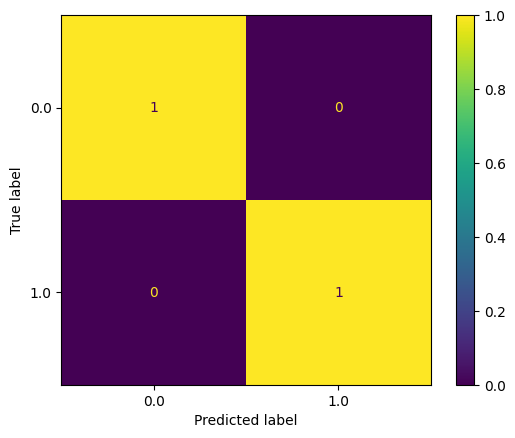

In [63]:
# Confusion matrix for training
ConfusionMatrixDisplay.from_estimator(rf_classifier, x_train, y_train, normalize='true')

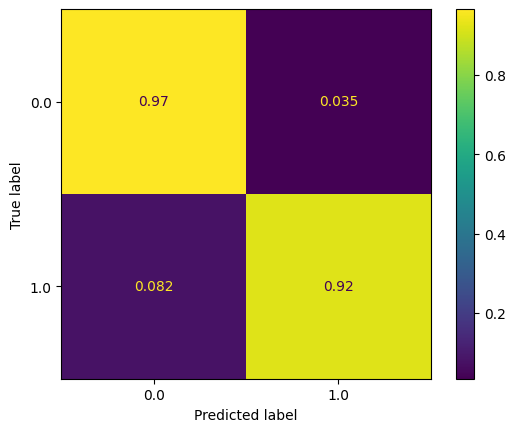

In [64]:
# Confusion matrix for validation
ConfusionMatrixDisplay.from_estimator(rf_classifier, x_val, y_val, normalize='true')

In [65]:
# !git add .
# !git commit -m "Random Forest and its confusion matrix on test"
# !git push

In [66]:
# Importing roc_auc_score

from sklearn.metrics import roc_auc_score

In [67]:
# Getting the ROC score for training

proba_predictions = rf_classifier.predict_proba(x_train)

roc_auc = roc_auc_score(y_train, proba_predictions[:, 1])

roc_auc



1.0

In [68]:
# Getting the ROC score for validation

proba_predictions = rf_classifier.predict_proba(x_val)

roc_auc = roc_auc_score(y_val, proba_predictions[:, 1])

roc_auc





0.9880212954747116

In [69]:
# !git add .
# !git commit -m "Getting ROC score for training and validation"
# !git push

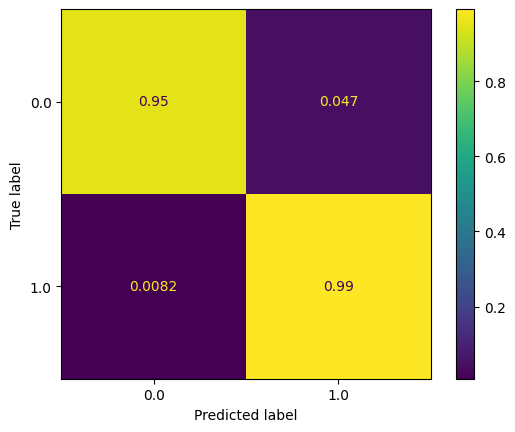

In [70]:

# Confusion matrix for full training data, not undersampled.
ConfusionMatrixDisplay.from_estimator(rf_classifier, features_train, target_df_train, normalize='true')

In [71]:
# Getting the ROC score for validation

proba_predictions = rf_classifier.predict_proba(features_train)

roc_auc = roc_auc_score(target_df_train, proba_predictions[:, 1])

roc_auc




0.9941059867682431

In [72]:
# Classification report for training NO UNDERSAMPLING

predictions_train_full = rf_classifier.predict(features_train)

report_train_full= classification_report(target_df_train, predictions_train_full)
print(report_train)





              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1028
         1.0       1.00      1.00      1.00       441

    accuracy                           1.00      1469
   macro avg       1.00      1.00      1.00      1469
weighted avg       1.00      1.00      1.00      1469



In [73]:
# Preparing the features on test data


cat_features_test=test_cleaned.pop('conf')
num_features_test=test_cleaned



In [74]:
# Applying one hot encoding to test data


test_ohe= OneHotEncoder(sparse_output=False)

ohe_array_test=test_ohe.fit_transform(pd.DataFrame(cat_features_test,columns=['conf']))

In [75]:
#  Applying scaling to test data


test_scale= StandardScaler()

scale_array_test= test_scale.fit_transform(num_features_test)

In [76]:
# Turning OHE in test into dataframe

x_test_processed=pd.DataFrame(ohe_array_test, columns=test_ohe.get_feature_names_out())

In [77]:
# Adding scaled features in test into dataframe

num_columns_test=list(num_features_test.select_dtypes('number').columns)




x_test_processed[num_columns_test]=scale_array_test

In [78]:
x_test_processed.head()

,conf_A10,conf_ACC,conf_AE,conf_ASun,conf_Amer,conf_B10,conf_B12,conf_BE,conf_BSky,conf_BSth,conf_BW,conf_CAA,conf_CUSA,conf_Horz,conf_MAAC,conf_MAC,conf_MEAC,conf_MVC,conf_MWC,conf_NEC,conf_OVC,conf_P12,conf_Pat,conf_SB,conf_SC,conf_SEC,conf_SWAC,conf_Slnd,conf_Sum,conf_WAC,conf_WCC,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,porpag,adjoe,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.675458,-1.142856,0.724470,-1.942278,0.306200,0.173170,-0.735206,-0.913609,-1.098720,-1.430656,-0.849483,-0.898549,-1.830036,-0.882948,-0.927226,-1.935406,-0.675649,-0.734875,0.542816,-0.555701,-0.640402,-0.360800,0.135376,-0.552150,-1.418374,-0.850756,-0.904411,-0.738565,-0.806514,-1.818687,-1.336260,-0.455199,-0.468386,-0.852964,0.412659,0.804933,-0.710216,-1.093131,-0.480148,-0.093525,-0.796322,-0.224361,-0.622727,-0.047183,-0.446359,-1.019688,-1.057036,-1.117648,-0.927909,-1.114426,-0.684429,-0.973761
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.587953,-0.619906,-0.803748,0.108028,-0.432411,-0.568201,-0.379580,0.286694,-0.239417,0.862950,-0.807962,-0.836167,-0.189433,-0.821115,-0.797983,-0.794068,-0.292435,-0.147037,0.112731,-0.555701,-0.303217,-1.393161,-0.826179,-0.552150,-0.865651,-0.761721,-0.792429,-0.738565,-0.677698,0.057245,-1.336260,-0.455199,-0.468386,-0.852964,0.831457,1.320875,-0.902441,-0.727565,-1.129365,-1.046221,-0.729399,-1.001558,-0.476229,-0.791983,-0.991520,-0.620751,-0.325595,-0.445316,-0.533705,-0.731520,-0.684429,-0.694412
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.829621,-0.225903,0.067903,0.875049,0.504129,0.297732,0.175197,1.022015,-0.037852,0.221646,-0.268190,0.099553,-0.392868,0.137295,0.025943,0.616625,-0.739518,-0.758389,-1.182707,2.292759,-0.003498,-0.058628,0.187632,-0.552150,-0.699773,0.306707,0.131427,-0.190494,-0.098025,0.817747,0.113233,1.129936,1.123652,1.125226,-0.378806,0.282413,0.276405,-0.198729,0.251625,-0.351880,0.972225,0.159294,0.641133,-0.114923,0.572481,0.930816,1.624937,1.508257,-0.060574,0.289774,4.280789,0.642372
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.071289,-1.203748,0.608439,-1.101505,1.913766,1.840504,-0.735206,0.037982,-1.098720,1.104383,-0.849483,-0.898549,-1.830036,-0.852032,-0.894915,0.347270,-0.675649,-0.781902,3.999043,-0.555701,-0.640402,-0.455763,0.430469,-0.552150,-1.418374,-0.850756,-0.904411,-0.660269,-0.742106,-1.818687,0.941384,-0.455199,-0.468386,-0.852964,-0.245786,-0.738868,-1.087516,-1.103178,0.118567,0.152630,0.017342,0.311355,-1.353963,0.204665,0.379757,-1.019688,-1.088089,-1.140606,-0.927909,-1.114426,-0.684429,-1.032290
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.862054,1.561439,0.384866,0.535790,0.499301,0.479323,-0.223104,-0.308051,-0.271243,-0.215950,0.437666,0.224316,0.995082,1.033873,1.156821,0.260528,2.964881,2.651070,0.864084,-0.460753,-0.115893,1.683163,0.685925,2.692345,-0.574808,-0.227507,-0.176525,3.019638,2.510503,0.201691,0.786504,-0.455199,-0.468386,-0.852964,1.009055,0.153651,1.125446,1.111950,0.497778,0.810456,-0.162043,0.493622,1.536830,0.747158,-0.125758,0.506863,0.597579,0.608856,0.090255,0.625501,-0.455738,1.751779


In [79]:
# !git add .
# !git commit -m "Preparing test data for prediction"
# !git push

In [80]:
columns_train = x_train.columns.tolist()
columns_x_test_processed = x_test_processed.columns.tolist()


# Columns present in train but not in test
columns_only_in_train = [col for col in columns_train if col not in columns_x_test_processed]


columns_only_in_train

['conf_GWC', 'conf_Ind', 'conf_Ivy', 'conf_P10', 'conf_ind']

In [81]:
# Inserting additional columns to test dataframe so it matches the train data

x_test_processed[columns_only_in_train]=0

# Reindex DataFrame test to match the column order of DataFrame train
x_test_processed = x_test_processed.reindex(columns=x_train.columns)


In [82]:
prediction_test= rf_classifier.predict(x_test_processed)

proba_predictions_test = rf_classifier.predict_proba(x_test_processed)


player_id=test_dataset['player_id']

# Converting series to dataframe
test_prediction = pd.DataFrame({'player_id': player_id})

# Adding the probability
test_prediction['drafted']=proba_predictions_test[:,1]



In [83]:
# !git add .
# !git commit -m "Preparing to submit result from experiment A"
# !git push


In [84]:
x_test_processed.to_csv('../data/processed/experiment_A_test_x.csv', index=False)

In [85]:
# !git add .
# !git commit -m "processed test data, ready to be used for experiment A"
# !git push

In [86]:
test_prediction.to_csv('../data/processed/experiment_A_prediction.csv', index=False)

In [87]:
# !git add .
# !git commit -m "Export test X from experiment A"
# !git push